In [125]:
# DATA SET : https://www.kaggle.com/datasets/ravindrasinghrana/employeedataset/

In [124]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as sc

#DB
import sqlite3

#Models
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


#Model tools
from sklearn.preprocessing import PolynomialFeatures
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold

#Model evaluation
from sklearn.metrics import make_scorer, log_loss
from sklearn.metrics import r2_score, accuracy_score,f1_score, confusion_matrix, classification_report


#saving
import pickle


import warnings
warnings.filterwarnings("ignore")


# Reading and Merging 2 DATA SETS

In [2]:
# check the columns of the 2 meaningful dataframes

path = "/Users/Sam/Documents/2-Learning/5-DataScience/DS_review_projects/HR_app/data/employee_engagement_survey_data.csv"
path_employee = "/Users/Sam/Documents/2-Learning/5-DataScience/DS_review_projects/HR_app/data/employee_data.csv" 

df_engage = pd.read_csv(path)
df_employee = pd.read_csv(path_employee)

print(df_engage.columns)
print(df_employee.columns)


Index(['Employee ID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score'],
      dtype='object')
Index(['EmpID', 'FirstName', 'LastName', 'StartDate', 'ExitDate', 'Title',
       'Supervisor', 'ADEmail', 'BusinessUnit', 'EmployeeStatus',
       'EmployeeType', 'PayZone', 'EmployeeClassificationType',
       'TerminationType', 'TerminationDescription', 'DepartmentType',
       'Division', 'DOB', 'State', 'JobFunctionDescription', 'GenderCode',
       'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score',
       'Current Employee Rating'],
      dtype='object')


In [3]:
# let's make the 2 columns to merge on having the same name

df_engage = df_engage.rename(columns={"Employee ID":"EmpID"})

In [4]:

# MERGE the 2 dataframes on Employee ID

df_HR = df_engage.merge(df_employee,
                        how='inner',
                        on="EmpID",
                        left_on=None,
                        right_on=None,
                        left_index=False,
                        right_index=False,
                        sort=False,
                        suffixes=('_engage', '_employee'),
                        copy=None,
                        indicator=False,
                        validate='one_to_one')
df_HR.columns

Index(['EmpID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'FirstName', 'LastName', 'StartDate',
       'ExitDate', 'Title', 'Supervisor', 'ADEmail', 'BusinessUnit',
       'EmployeeStatus', 'EmployeeType', 'PayZone',
       'EmployeeClassificationType', 'TerminationType',
       'TerminationDescription', 'DepartmentType', 'Division', 'DOB', 'State',
       'JobFunctionDescription', 'GenderCode', 'LocationCode', 'RaceDesc',
       'MaritalDesc', 'Performance Score', 'Current Employee Rating'],
      dtype='object')

# Data and DataType Inspection

In [5]:
# Let's inspect the content of the column on a few lines 
print(df_HR.loc[:5,"EmpID":"StartDate"],"\n")
print(df_HR.loc[:2,'ExitDate':'PayZone'],"\n")
print(df_HR.loc[:2,'EmployeeClassificationType':'State'],"\n")
print(df_HR.loc[:2,'JobFunctionDescription':'Current Employee Rating'],"\n")

   EmpID Survey Date  Engagement Score  Satisfaction Score  \
0   1001  10-10-2022                 2                   5   
1   1002  03-08-2023                 4                   5   
2   1003  03-01-2023                 2                   5   
3   1004  30-07-2023                 3                   5   
4   1005  19-06-2023                 2                   4   
5   1006  03-05-2023                 5                   2   

   Work-Life Balance Score FirstName    LastName  StartDate  
0                        5     Susan     Exantus  29-Aug-19  
1                        3    Sandra      Martin  12-Dec-22  
2                        2     Keyla  Del Bosque  08-Mar-23  
3                        3    Andrew       Szabo  29-May-20  
4                        5      Luke   Patronick  16-Sep-22  
5                        1     Colby    Andreola  15-Aug-21   

    ExitDate              Title          Supervisor  \
0        NaN  Software Engineer      Angela Carlson   
1  28-May-23  Softw

In [6]:
# Let's inspect the dtype of each column

df_HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   EmpID                       3000 non-null   int64 
 1   Survey Date                 3000 non-null   object
 2   Engagement Score            3000 non-null   int64 
 3   Satisfaction Score          3000 non-null   int64 
 4   Work-Life Balance Score     3000 non-null   int64 
 5   FirstName                   3000 non-null   object
 6   LastName                    3000 non-null   object
 7   StartDate                   3000 non-null   object
 8   ExitDate                    1533 non-null   object
 9   Title                       3000 non-null   object
 10  Supervisor                  3000 non-null   object
 11  ADEmail                     3000 non-null   object
 12  BusinessUnit                3000 non-null   object
 13  EmployeeStatus              3000 non-null   obje

In [7]:
# Format Dates from objects to DateTime
df_HR["Survey Date"] = pd.to_datetime(df_HR["Survey Date"], format='%d-%m-%Y')
df_HR["StartDate"] = pd.to_datetime(df_HR["StartDate"], format='%d-%b-%y')
df_HR["ExitDate"] = pd.to_datetime(df_HR["ExitDate"], format='%d-%b-%y')
df_HR["DOB"] = pd.to_datetime(df_HR["DOB"], format='%d-%m-%Y')

df_HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   EmpID                       3000 non-null   int64         
 1   Survey Date                 3000 non-null   datetime64[ns]
 2   Engagement Score            3000 non-null   int64         
 3   Satisfaction Score          3000 non-null   int64         
 4   Work-Life Balance Score     3000 non-null   int64         
 5   FirstName                   3000 non-null   object        
 6   LastName                    3000 non-null   object        
 7   StartDate                   3000 non-null   datetime64[ns]
 8   ExitDate                    1533 non-null   datetime64[ns]
 9   Title                       3000 non-null   object        
 10  Supervisor                  3000 non-null   object        
 11  ADEmail                     3000 non-null   object      

In [8]:
#Let's inspect the similarity between the 2 columns : 'Title' vs 'JobFunctionDescription'
lst_attr_Title = sorted(df_HR['Title'].unique())
lst_attr_JobFunctDesc = sorted(df_HR['JobFunctionDescription'].unique())
print(lst_attr_Title, '\n')
print(lst_attr_JobFunctDesc, '\n')

# The 2 columns are redundant. Let's get rid of the 'JobFunctionDescription' column 

['Accountant I', 'Administrative Assistant', 'Area Sales Manager', 'BI Developer', 'BI Director', 'CIO', 'Data Analyst', 'Data Analyst ', 'Data Architect', 'Database Administrator', 'Director of Operations', 'Director of Sales', 'Enterprise Architect', 'IT Director', 'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support', 'IT Support', 'Network Engineer', 'President & CEO', 'Principal Data Architect', 'Production Manager', 'Production Technician I', 'Production Technician II', 'Sales Manager', 'Senior BI Developer', 'Shared Services Manager', 'Software Engineer', 'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA', 'Sr. Network Engineer'] 

['Accountant', 'Accounting', 'Administration', 'Administrative', 'Administrator', 'Analyst', 'Apprentice', 'Assistant', 'Associate', 'Attendant', 'Billing', 'Business Development', 'Ceo', 'Cfo', 'Chief Operating Officer', 'Cio', 'Civil Hand', 'Clerical', 'Clerk', 'Construction Manager', 'Contracts', 'Controller', 'Coordinator', 'Cpo

# DATASET anonymization

In [9]:
# Let's annonymise the dataset and remove columns showing addresses and race bias

df_HR = df_HR.drop(['FirstName','LastName','Supervisor','ADEmail','BusinessUnit','EmployeeStatus','JobFunctionDescription','PayZone','EmployeeClassificationType','TerminationDescription','DepartmentType','Division','State','LocationCode','RaceDesc'],axis=1)


# DATA AUGMENTATION

In [10]:
# we want to see the departures which happened after a survey

df_HR['time_Survey_vs_Departure'] = df_HR['ExitDate']-df_HR['Survey Date']
df_HR['time_Survey_vs_Departure_in_days'] = df_HR['time_Survey_vs_Departure'].dt.days
df_HR['time_Survey_vs_Departure_in_days'] = df_HR['time_Survey_vs_Departure_in_days'].convert_dtypes(convert_integer=True)



In [11]:

# we want to know the age of the person at the time of departure
df_HR['AGE'] = df_HR['Survey Date'].dt.year - df_HR['DOB'].dt.year

df_HR['AGE'] = df_HR['AGE'].convert_dtypes(convert_integer=True)


In [12]:
# Let's check we have correctly converted the Keep the feature 'time_Survey_vs_Departure_in_days' to integer
# This Target will be used for our 2nd model to predict a number of days before departure
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype          
---  ------                            --------------  -----          
 0   EmpID                             3000 non-null   int64          
 1   Survey Date                       3000 non-null   datetime64[ns] 
 2   Engagement Score                  3000 non-null   int64          
 3   Satisfaction Score                3000 non-null   int64          
 4   Work-Life Balance Score           3000 non-null   int64          
 5   StartDate                         3000 non-null   datetime64[ns] 
 6   ExitDate                          1533 non-null   datetime64[ns] 
 7   Title                             3000 non-null   object         
 8   EmployeeType                      3000 non-null   object         
 9   TerminationType                   3000 non-null   object         
 10  DOB                               30

In [13]:
# We need a boolean column to indicate whether an employee has left or is still at the company
df_HR['EmployeeLeft']  = df_HR['TerminationType'].apply(lambda x: 0 if x =='Unk' else 1)

df_HR['EmployeeLeft'].value_counts()


1    1533
0    1467
Name: EmployeeLeft, dtype: int64

In [14]:
# Let's add a specific column which indicates when someone is a manager

df_HR['Manager'] = df_HR['Title'].apply(lambda x: 1 if 'manager' in x.lower() else 0)

df_HR['Manager'].value_counts()

0    2445
1     555
Name: Manager, dtype: int64

In [15]:
df_HR.head(5)

,EmpID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,StartDate,ExitDate,Title,EmployeeType,TerminationType,DOB,GenderCode,MaritalDesc,Performance Score,Current Employee Rating,time_Survey_vs_Departure,time_Survey_vs_Departure_in_days,AGE,EmployeeLeft,Manager
0,1001,2022-10-10,2,5,5,2019-08-29,NaT,Software Engineer,Part-Time,Unk,1957-09-21,Female,Married,Fully Meets,3,NaT,<NA>,65,0,0
1,1002,2023-08-03,4,5,3,2022-12-12,2023-05-28,Software Engineer,Part-Time,Involuntary,1950-07-08,Female,Widowed,Fully Meets,3,-67 days,-67,73,1,0
2,1003,2023-01-03,2,5,2,2023-03-08,2023-03-15,Software Engineer,Contract,Voluntary,1973-11-23,Female,Married,Fully Meets,3,71 days,71,50,1,0
3,1004,2023-07-30,3,5,3,2020-05-29,2021-03-05,Software Engineer,Part-Time,Involuntary,1957-01-27,Male,Single,Fully Meets,3,-877 days,-877,66,1,0
4,1005,2023-06-19,2,4,5,2022-09-16,NaT,Software Engineer,Full-Time,Unk,1970-07-28,Male,Divorced,Fully Meets,3,NaT,<NA>,53,0,0


# DATA FILTERING

In [16]:
# # Our goal is to only assess Manager model

# df_HR_managers = df_HR.loc[(df_HR['Manager']==True)]
# df_HR_managers.reset_index(drop=True, inplace=True)

# print(df_HR_managers.Manager.value_counts())
# df_HR_managers.head(5)

df_HR_managers = df_HR.copy()

# DATA EXPLORATION

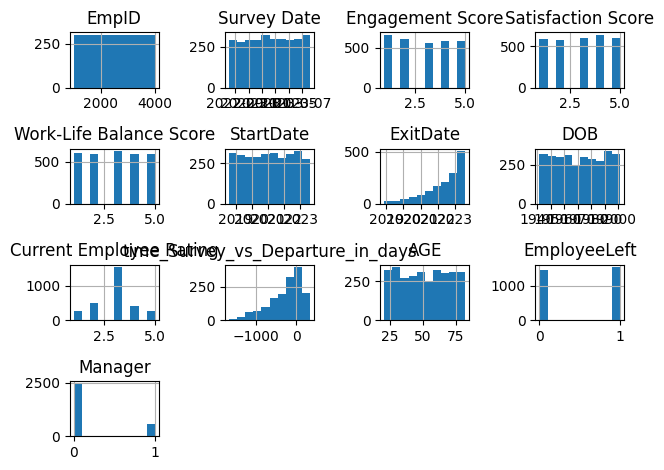

In [17]:

df_HR_managers.hist(orientation='vertical')
plt.tight_layout()
plt.show()

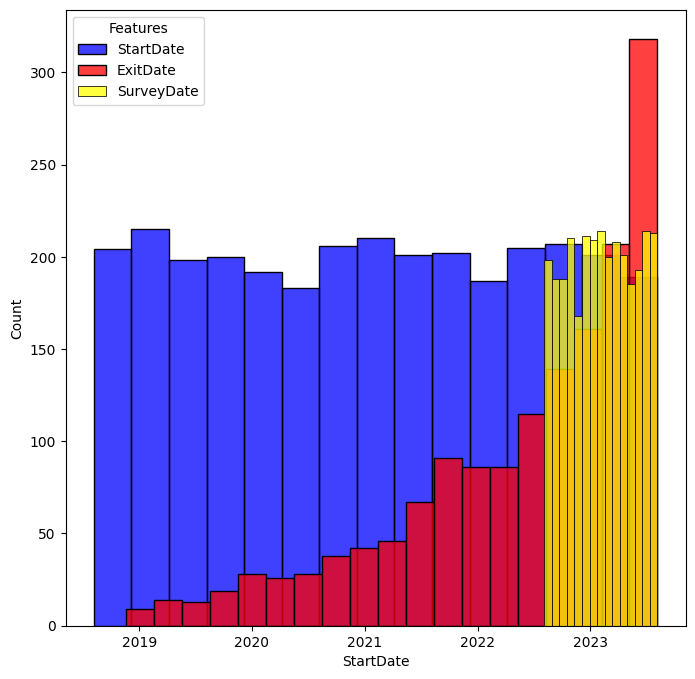

In [18]:
fig1, (ax1) = plt.subplots(1,1,figsize=(8,8))
sns.histplot(data=df_HR_managers, x='StartDate', ax=ax1, color='blue')
sns.histplot(data=df_HR_managers, x='ExitDate', ax=ax1, color='red')
sns.histplot(data=df_HR_managers, x='Survey Date', ax=ax1, color='yellow')
ax1.legend(labels=['StartDate','ExitDate','SurveyDate'], title='Features')
plt.show()


In [19]:

# It looks like the manager exit were not recorded when the survey started


# Let's take our dataset between the start of recording when of managers quitting
# and the last date of the Survey

df_min_date = df_HR_managers['Survey Date'].min()
print('df_min_date:', df_min_date)

# Let's reassign oiur DataFrame to manager quitting was recorded
df_HR_managers = df_HR_managers.loc[(df_HR_managers['Survey Date']>= df_min_date)]


df_min_date: 2022-08-05 00:00:00


# Check whether Target Engineering is required

In [20]:
df_HR_managers.columns

Index(['EmpID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'StartDate', 'ExitDate', 'Title',
       'EmployeeType', 'TerminationType', 'DOB', 'GenderCode', 'MaritalDesc',
       'Performance Score', 'Current Employee Rating',
       'time_Survey_vs_Departure', 'time_Survey_vs_Departure_in_days', 'AGE',
       'EmployeeLeft', 'Manager'],
      dtype='object')

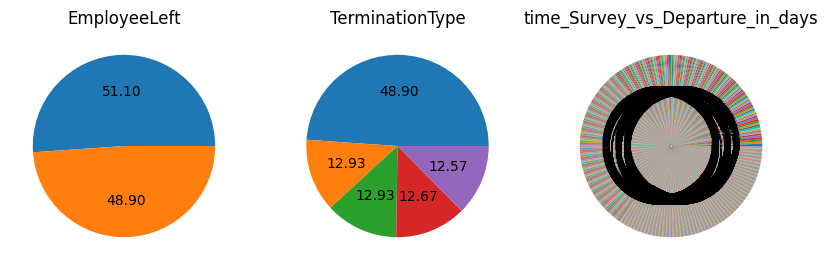

In [21]:
# Let's check the balance of the dataset on specific TARGETS such as:
# TerminationType, time_Survey_vs_Departure_in_days
# and for curiosity also on
# Title, EmployeeType, Gender, MaritalDescription

fig3,(ax7,ax8, ax9) = plt.subplots(1,3, figsize=(10,8))

ax7.pie(df_HR_managers[['EmployeeLeft']].value_counts(), autopct="%.2f")
ax8.pie(df_HR_managers[['TerminationType']].value_counts(), autopct="%.2f")
ax9.pie(df_HR_managers[['time_Survey_vs_Departure_in_days']].value_counts(), autopct="%.2f")

#ax1.pie(df_HR_managers[['Title']].value_counts(), autopct="%.2f")
#ax2.pie(df_HR_managers[['EmployeeType']].value_counts(), autopct="%.2f")

#ax4.pie(df_HR_managers[['GenderCode']].value_counts(), autopct="%.2f")
#ax5.pie(df_HR_managers[['MaritalDesc']].value_counts(), autopct="%.2f")

ax7.set_title('EmployeeLeft')
ax8.set_title('TerminationType')
ax9.set_title('time_Survey_vs_Departure_in_days')


# ax1.set_title("Title")
# ax2.set_title('EmployeeType')
# ax4.set_title('GenderCode')
# ax5.set_title('MaritalDesc')


plt.show()

In [22]:
# 1st Model:
# The Target " TerminationType" could be better balanced 
# the majority class, 50% of employee didn't leave the company
# Let's re-balance

# 2nd Model:
# The target "time_Survey_vs_Departure_in_days" is relatively well balanced 
# No need to re-balance


In [23]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy='not majority')

X_res, y_res = ros.fit_resample(df_HR_managers,df_HR_managers['TerminationType'])

Text(0.5, 1.0, 'TerminationType')

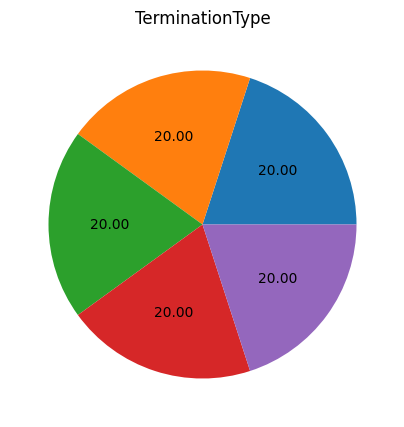

In [24]:
fig4,ax10 = plt.subplots(1,1,figsize=(5,5))
ax10.pie(y_res.value_counts(), autopct="%.2f")
ax10.set_title('TerminationType')

In [25]:
df_HR_managers = X_res
df_HR_managers['TerminationType'] = y_res


# Categorical Encoding

In [26]:
# We could notice there are redundant Titles due to space formatting. 
# Let's remove spaces:
df_HR_managers['Title'] = df_HR_managers['Title'].apply(lambda x:x.strip())

listTitle = sorted(df_HR_managers['Title'].unique())
print('Total Titles:',len(sorted(listTitle)))
print(listTitle)

Total Titles: 31
['Accountant I', 'Administrative Assistant', 'Area Sales Manager', 'BI Developer', 'BI Director', 'CIO', 'Data Analyst', 'Data Architect', 'Database Administrator', 'Director of Operations', 'Director of Sales', 'Enterprise Architect', 'IT Director', 'IT Manager - DB', 'IT Manager - Infra', 'IT Manager - Support', 'IT Support', 'Network Engineer', 'President & CEO', 'Principal Data Architect', 'Production Manager', 'Production Technician I', 'Production Technician II', 'Sales Manager', 'Senior BI Developer', 'Shared Services Manager', 'Software Engineer', 'Software Engineering Manager', 'Sr. Accountant', 'Sr. DBA', 'Sr. Network Engineer']


In [27]:
# Conversion function
def convCategToNumeric(serieCategory):
    listCategory = sorted(serieCategory.unique())
    dic = {}
    index =0
    for cat in listCategory:
        dic[cat]=index
        index+=1
    return dic
    

In [28]:
# Lets build a conversion dictionary for the features which have an ordinal relation:
# 'TerminationType','Performance Score':
Termination_to_num = convCategToNumeric(df_HR_managers['TerminationType'])
Performance_to_num = convCategToNumeric(df_HR_managers['Performance Score'])

Performance_to_num = {'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}
print(Termination_to_num)
print(Performance_to_num)

{'Involuntary': 0, 'Resignation': 1, 'Retirement': 2, 'Unk': 3, 'Voluntary': 4}
{'Exceeds': 3, 'Fully Meets': 2, 'Needs Improvement': 1, 'PIP': 0}


In [29]:
NumToLabel = {0:'Involuntary', 1:'Resignation', 2:'Retirement', 3:'Unk', 4:'Voluntary'}
NumToLabel_Perf = {3:'Exceeds', 2:'Fully Meets', 1:'Needs Improvement', 0:'PIP'}

In [30]:
# Let's replace the categorical values of Dependant Variable by their numerical value in the dataframe:

df_HR_managers['TerminationType']=df_HR_managers['TerminationType'].apply(lambda x: Termination_to_num[x])
df_HR_managers['Performance Score']=df_HR_managers['Performance Score'].apply(lambda x: Performance_to_num[x])

In [31]:
# Let's encode the categorical input features which do not have an ordinal nature: 

df_HR_managers_OHE = pd.get_dummies(df_HR_managers, columns = ['Title','EmployeeType','MaritalDesc','GenderCode'], drop_first=True)
df_HR_managers_OHE.columns

Index(['EmpID', 'Survey Date', 'Engagement Score', 'Satisfaction Score',
       'Work-Life Balance Score', 'StartDate', 'ExitDate', 'TerminationType',
       'DOB', 'Performance Score', 'Current Employee Rating',
       'time_Survey_vs_Departure', 'time_Survey_vs_Departure_in_days', 'AGE',
       'EmployeeLeft', 'Manager', 'Title_Administrative Assistant',
       'Title_Area Sales Manager', 'Title_BI Developer', 'Title_BI Director',
       'Title_CIO', 'Title_Data Analyst', 'Title_Data Architect',
       'Title_Database Administrator', 'Title_Director of Operations',
       'Title_Director of Sales', 'Title_Enterprise Architect',
       'Title_IT Director', 'Title_IT Manager - DB',
       'Title_IT Manager - Infra', 'Title_IT Manager - Support',
       'Title_IT Support', 'Title_Network Engineer', 'Title_President & CEO',
       'Title_Principal Data Architect', 'Title_Production Manager',
       'Title_Production Technician I', 'Title_Production Technician II',
       'Title_Sales Man

# Models Training

### MODEL 1: Termination Type Prediction

In [32]:
# Let's first train several models with their default settings
# then we will take the most accurate and tune its hyperparameters

In [33]:
# The Target is Resignation vs any other type of Termination like Retirement or Voluntary
y = df_HR_managers_OHE[['TerminationType']]

# Let's remove any DateTime features. We don't need them as the time is correlated in the
# 'time_Survey_vs_Departure_in_days' feature

X = df_HR_managers_OHE.drop(['EmpID','TerminationType','EmployeeLeft', 'Survey Date', 'StartDate', 'ExitDate', 'DOB','time_Survey_vs_Departure','time_Survey_vs_Departure_in_days', 'Manager' ], axis=1)


In [34]:
# Check no null values remain

X.isna().sum()

Engagement Score                      0
Satisfaction Score                    0
Work-Life Balance Score               0
Performance Score                     0
Current Employee Rating               0
AGE                                   0
Title_Administrative Assistant        0
Title_Area Sales Manager              0
Title_BI Developer                    0
Title_BI Director                     0
Title_CIO                             0
Title_Data Analyst                    0
Title_Data Architect                  0
Title_Database Administrator          0
Title_Director of Operations          0
Title_Director of Sales               0
Title_Enterprise Architect            0
Title_IT Director                     0
Title_IT Manager - DB                 0
Title_IT Manager - Infra              0
Title_IT Manager - Support            0
Title_IT Support                      0
Title_Network Engineer                0
Title_President & CEO                 0
Title_Principal Data Architect        0


In [35]:
#Let's inspect the ranges / category options of each field

def column_options(df):
    lst_col = list(df.columns)
    for col in lst_col:
        print('-----',col,'-----', '\n')
        print('isna = ',df[col].isna().sum())
        print(df[col].value_counts(), '\n\n\n')
    
    
column_options(X)

----- Engagement Score ----- 

isna =  0
1    1608
2    1524
5    1457
4    1429
3    1317
Name: Engagement Score, dtype: int64 



----- Satisfaction Score ----- 

isna =  0
3    1494
1    1470
4    1465
5    1462
2    1444
Name: Satisfaction Score, dtype: int64 



----- Work-Life Balance Score ----- 

isna =  0
1    1507
2    1499
3    1473
5    1472
4    1384
Name: Work-Life Balance Score, dtype: int64 



----- Performance Score ----- 

isna =  0
2    5816
3     874
1     405
0     240
Name: Performance Score, dtype: int64 



----- Current Employee Rating ----- 

isna =  0
3    3690
2    1276
4    1044
5     676
1     649
Name: Current Employee Rating, dtype: int64 



----- AGE ----- 

isna =  0
66    203
80    180
29    166
47    163
36    160
     ... 
81     81
57     79
54     67
82     28
21     21
Name: AGE, Length: 62, dtype: Int64 



----- Title_Administrative Assistant ----- 

isna =  0
0    7247
1      88
Name: Title_Administrative Assistant, dtype: int64 



----- Ti

In [36]:
X.columns

Index(['Engagement Score', 'Satisfaction Score', 'Work-Life Balance Score',
       'Performance Score', 'Current Employee Rating', 'AGE',
       'Title_Administrative Assistant', 'Title_Area Sales Manager',
       'Title_BI Developer', 'Title_BI Director', 'Title_CIO',
       'Title_Data Analyst', 'Title_Data Architect',
       'Title_Database Administrator', 'Title_Director of Operations',
       'Title_Director of Sales', 'Title_Enterprise Architect',
       'Title_IT Director', 'Title_IT Manager - DB',
       'Title_IT Manager - Infra', 'Title_IT Manager - Support',
       'Title_IT Support', 'Title_Network Engineer', 'Title_President & CEO',
       'Title_Principal Data Architect', 'Title_Production Manager',
       'Title_Production Technician I', 'Title_Production Technician II',
       'Title_Sales Manager', 'Title_Senior BI Developer',
       'Title_Shared Services Manager', 'Title_Software Engineer',
       'Title_Software Engineering Manager', 'Title_Sr. Accountant',
       '

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y , test_size=0.3, random_state=42)

In [38]:
# CROSS_VALIDATION
# it assesses how well the model generalizes different training subsets,
# while test evaluation assesses the model's performance
# on a completely separate set of data not seen during training or cross-validation

num_folds = 5  # number of folds we pick
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
scoring_metric = 'accuracy' # Define a scoring metric (accuracy is used for classification)


# Dictionary to capture the performances of each model
models_accuracy = {}


# Fonction to easily run and evaluate each model
def train_validate_predict_accuracy(classifiers, x_train, x_test, y_train, y_test, index):
    model = classifiers
    model.fit(x_train, y_train)

    # CV evaluation
    cv_score = cross_val_score(model, x_train, y_train, cv=kf, scoring=scoring_metric)    
    
    # Prediction accuracy
    y_pred = model.predict(x_test)
    r2 = accuracy_score(y_test, y_pred)
    
    # Recordings
    models_accuracy[index] = cv_score.mean(),cv_score.std(), r2


In [39]:
# Let's use CLASSIFICATION models in supervised Learning

model_names = ['SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'GradientBoostingClassifier']
model_list = [SVC(kernel='linear'), DecisionTreeClassifier(), RandomForestClassifier(), LogisticRegression(multi_class='multinomial', solver='lbfgs'), GradientBoostingClassifier()]

index = 0 
for classifier in model_list:
    train_validate_predict_accuracy(classifier, x_train, x_test, y_train, y_test, model_names[index])
    index+=1

In [40]:
score_df = pd.DataFrame({'Parameter':['MEAN','STD','ACCURACY'],
                         'SVC':models_accuracy['SVC'],
                         'DecisionTreeClassifier':models_accuracy['DecisionTreeClassifier'],
                         'RandomForestClassifier':models_accuracy['RandomForestClassifier'],
                         'LogisticRegression':models_accuracy['LogisticRegression'],
                         'GradientBoostingClassifier':models_accuracy['GradientBoostingClassifier'],
                        })
score_df = score_df.set_index('Parameter')
score_df = score_df.T
score_df
#sns.barplot(data)

Parameter,MEAN,STD,ACCURACY
SVC,0.241330,0.010103,0.249432
DecisionTreeClassifier,0.787491,0.015997,0.830532
RandomForestClassifier,0.816706,0.018125,0.859609
LogisticRegression,0.247564,0.013824,0.244434
GradientBoostingClassifier,0.394427,0.012435,0.398910


In [41]:

# Based on the MEAN and STANDARD DEVIATION, 
# RandomForestClassifier is the best choices: 
# a high average performance with consistent results. 



### MODEL 1 Fine-Tunning

In [42]:
# The result obtained is already good with the default parameters,


In [43]:
rfc = RandomForestClassifier(random_state=42)

param_grid = { 
    'n_estimators':[100,200,300,400,500],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'max_depth':[1,2,3,5,8,13,21],
    'max_features':['sqrt', 'log2', None],
    
}

# define what criteria defines the best model: maximize the accuracy_score
custom_scorer = make_scorer(accuracy_score, greater_is_better=True)


grid_rfc = GridSearchCV(estimator= rfc, param_grid= param_grid, scoring= custom_scorer, cv = 5)
grid_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 5, 8, 13, 21],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring=make_scorer(accuracy_score))

In [44]:
print(grid_rfc.best_params_)
print(grid_rfc.best_score_)

{'criterion': 'entropy', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 500}
0.8293737698134767


In [45]:
bestModel_rfc = grid_rfc.best_estimator_

In [46]:
# # Prediction accuracy
y_pred_rfc = bestModel_rfc.predict(x_test)
r2_rfc = accuracy_score(y_test, y_pred_rfc)

r2_rfc

0.8609722853248524

In [48]:
class_names = [NumToLabel[i] for i in range(0, len(NumToLabel))]

classif_rfc = confusion_matrix(y_test, y_pred_rfc)
report_rfc = classification_report(y_test, y_pred_rfc, target_names=class_names)

In [49]:

print(classif_rfc, '\n')
print(report_rfc)

[[425   4   5  12   5]
 [  0 406   2  10  10]
 [  7   1 409  11   4]
 [ 56  50  38 255  55]
 [  4   4   1  27 400]] 

              precision    recall  f1-score   support

 Involuntary       0.86      0.94      0.90       451
 Resignation       0.87      0.95      0.91       428
  Retirement       0.90      0.95      0.92       432
         Unk       0.81      0.56      0.66       454
   Voluntary       0.84      0.92      0.88       436

    accuracy                           0.86      2201
   macro avg       0.86      0.86      0.86      2201
weighted avg       0.86      0.86      0.85      2201



# SAVE MODEL

In [50]:
path_models = "/Users/Sam/Documents/2-Learning/5-DataScience/DS_review_projects/HR_app/data/models"

pickle.dump(bestModel_rfc, open(path_models+'model_rfc_pckl1.pkl', 'wb'))


In [60]:
test_path = "/Users/Sam/Documents/2-Learning/5-DataScience/DS_review_projects/HR_app/data/models/modelsmodel_rfc_pckl1.pkl"
with open(test_path, 'rb') as file:
    loaded_model = pickle.load(file)


# N/A: Random Tests

In [119]:

df_HR_managers_OHE[(df_HR_managers_OHE['TerminationType']==1) & (df_HR_managers_OHE['Title_Area Sales Manager']==1)]

#FILTERS:
#(df_HR_managers_OHE['TerminationType']==1) & (df_HR_managers_OHE['Title_IT Manager - DB']==1)
# index: 1217,1245,4733

#(df_HR_managers_OHE['TerminationType']==1) & (df_HR_managers_OHE['Title_Area Sales Manager']==1)
#Index: 644,5108,5133,5164

#(df_HR_managers_OHE['TerminationType']==1) & (df_HR_managers_OHE['Title_Software Engineering Manager']==1)
#Index: 4517, 5027

,EmpID,Survey Date,Engagement Score,Satisfaction Score,Work-Life Balance Score,StartDate,ExitDate,TerminationType,DOB,Performance Score,...,Title_Software Engineering Manager,Title_Sr. Accountant,Title_Sr. DBA,Title_Sr. Network Engineer,EmployeeType_Full-Time,EmployeeType_Part-Time,MaritalDesc_Married,MaritalDesc_Single,MaritalDesc_Widowed,GenderCode_Male
644,1645,2022-09-26,5,5,5,2021-02-18,2022-10-28,1,1975-12-19,2,...,0,0,0,0,0,1,0,0,1,1
653,1654,2023-06-11,2,3,3,2021-07-27,2021-11-23,1,1999-12-19,2,...,0,0,0,0,1,0,0,0,0,1
674,1675,2023-01-25,4,1,4,2023-02-03,2023-04-16,1,1959-11-02,2,...,0,0,0,0,1,0,0,0,1,1
697,1698,2023-03-21,3,5,4,2021-02-15,2021-06-05,1,1994-11-14,2,...,0,0,0,0,1,0,1,0,0,1
1575,2576,2022-11-19,2,4,1,2020-04-16,2021-03-15,1,1969-12-27,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5108,3523,2023-02-27,3,2,3,2021-06-25,2022-08-25,1,1978-12-19,2,...,0,0,0,0,1,0,0,1,0,0
5119,3523,2023-02-27,3,2,3,2021-06-25,2022-08-25,1,1978-12-19,2,...,0,0,0,0,1,0,0,1,0,0
5133,2675,2023-01-30,2,4,4,2020-11-29,2022-07-16,1,1946-06-07,2,...,0,0,0,0,0,1,0,0,0,1
5159,3440,2022-09-24,1,4,5,2019-12-05,2023-02-17,1,1951-11-06,2,...,0,0,0,0,0,0,0,0,0,0


In [120]:

a = X.iloc[644]
a

# column_options(a)


Engagement Score                       5
Satisfaction Score                     5
Work-Life Balance Score                5
Performance Score                      2
Current Employee Rating                3
AGE                                   47
Title_Administrative Assistant         0
Title_Area Sales Manager               1
Title_BI Developer                     0
Title_BI Director                      0
Title_CIO                              0
Title_Data Analyst                     0
Title_Data Architect                   0
Title_Database Administrator           0
Title_Director of Operations           0
Title_Director of Sales                0
Title_Enterprise Architect             0
Title_IT Director                      0
Title_IT Manager - DB                  0
Title_IT Manager - Infra               0
Title_IT Manager - Support             0
Title_IT Support                       0
Title_Network Engineer                 0
Title_President & CEO                  0
Title_Principal 

In [115]:
input = np.array(a)
print(list(input))

[4, 1, 5, 3, 4, 55, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0]


In [116]:

loaded_model.predict_proba([list(input)])

array([[0.0181273 , 0.87565659, 0.01411497, 0.05143128, 0.04066986]])